# TimeSeriesForecasting_Databricks

#### *Parts of this notebook have been obfuscated to protect privacy and security*

In [ ]:
%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list 
apt-get update
ACCEPT_EULA=Y apt-get install msodbcsql17
apt-get -y install unixodbc-dev
sudo apt-get install python3-pip -y
pip3 install --upgrade pyodbc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)

100   983  100   983    0     0   9273      0 --:--:-- --:--:-- --:--:--  9273
OK
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    79  100    79    0     0    738      0 --:--:-- --:--:-- --:--:--   738
Hit:1 https://repos.azul.com/zulu/deb stable InRelease
Hit:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://archive.ubuntu.com/ubu

In [ ]:
import os

import pandas as pd
import pyodbc as dbc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#set up connection to SQL prod server
prod_conn = dbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                       'SERVER=SERVER_NAME;'
                       'DATABASE=DATABASE_NAME;UID=USERNAME;'
                       'PWD=PASSWORD')

In [ ]:
query = '''
select MIN(TRANSACTION_DATE) minimum_date, MAX(TRANSACTION_DATE) maximum_date, COUNT(*) number_of_rows
FROM DATABASE_NAME.TABLE_NAME
WHERE ORG_ID = 87
'''
date_range = pd.read_sql_query(query, prod_conn)
date_range

<command-3802221619425796>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  date_range = pd.read_sql_query(query, prod_conn)


,minimum_date,maximum_date,number_of_rows
0,2016-01-04,2023-09-21,8471647


In [ ]:
query = '''
select TOP 7 *
FROM DATABASE_NAME.TABLE_NAME
WHERE ORG_ID = 87
'''
orders = pd.read_sql_query(query, prod_conn)
orders

<command-2213455742570804>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql_query(query, prod_conn)


,ORG_ID,SHIP_TO_ORG_ID,ORGID_SHIPTO_ORGID,MONTH,TRANSACTION_DATE,ORIGINALSALESREPID,TERRITORY_ID_ORIG,REGION_ID_ORIG,ALIGNSALESREPID,ALIGNTERRITORYID,...,SERVICE_PRODUCT_FAMILY,REPAIR_PRODUCT_FAMILY,SERVICE_PRODUCT_CLASS,REPAIR_PRODUCT_CLASS,SM_PROCARE,FK_ORG_REGION_TERR_REP_ORIG,FK_ORG_REGION_TERR_REP_CURR,FK_TRX_PRODUCT,TOTAL_QTY,TOTAL_ORDERS
0,87.0,2871.0,872871,2017-10-01,2017-10-16,100699141.0,424.0,4388.0,101894151.0,424.0,...,VIDEO,None,Arthroscopes,None,Other,874388424100699141,874388424101894151,87ProcarePROCARE050Service ContractsS000ServiceB,4.0,1591.74
1,87.0,8430.0,878430,2016-03-01,2016-03-01,100623141.0,371.0,88.0,100623141.0,371.0,...,VIDEO,None,Cameras,None,Other,8788371100623141,8788371100623141,87ProcarePROCARE050Service ContractsS000ServiceB,36.0,14550.00
2,87.0,75156.0,8775156,2016-04-01,2016-04-01,100774141.0,417.0,9286.0,101143151.0,417.0,...,VIDEO,None,URO Scopes,None,Other,879286417100774141,879286417101143151,87ProcarePROCARE050Service ContractsS000ServiceB,3.0,6134.00
3,87.0,217406.0,87217406,2016-01-01,2016-01-08,100602141.0,181.0,94.0,101077144.0,181.0,...,VIDEO,None,URO Scopes,None,Other,8794181100602141,8794181101077144,87ProcarePROCARE050Service ContractsS000ServiceB,5.0,1685.00
4,87.0,95234.0,8795234,2017-06-01,2017-06-15,100605141.0,392.0,101.0,101913150.0,392.0,...,VIDEO,None,URO Scopes,None,Other,87101392100605141,87101392101913150,87ProcarePROCARE050Service ContractsS000ServiceB,4.0,734.02
5,87.0,468734.0,87468734,2017-04-01,2017-04-03,100703141.0,127.0,4391.0,100993145.0,16106.0,...,VIDEO,None,URO Scopes,None,Other,874391127100703141,87439116106100993145,87ProcarePROCARE050Service ContractsS000ServiceB,2.0,542.40
6,87.0,52300.0,8752300,2017-09-01,2017-09-01,100320141.0,404.0,7086.0,101036149.0,404.0,...,VIDEO,None,URO Scopes,None,Other,877086404100320141,877086404101036149,87ProcarePROCARE050Service ContractsS000ServiceB,4.0,1625.00


In [ ]:
orders.columns

In [ ]:
# date
# store
# item
# $

other_items = ['BUSINESS_UNIT_NAME', 'PRODUCT_FAMILY_NAME', 'PRODUCT_CLASS_CODE', 'PRODUCT_CLASS_CODE_DESC', 'PRODUCT_GROUP_CODE_DESC', 'REPORT_CATEGORY_CODE_DESC', 'MAJOR_CODE', 'MAJOR_CODE_DESC']

other_stores = ['ALIGNSALESREPID', 'ALIGNTERRITORYID', 'ALIGNREGIONID']

date = 'TRANSACTION_DATE'
store = 'ORGID_SHIPTO_ORGID'
item = 'ITEM_NUMBER'
amount = 'TOTAL_ORDERS'

In [ ]:
query = '''
select TOP 7 {date}, {store}, {item}, SUM({amount}) total_amount
FROM DATABASE_NAME.TABLE_NAME
WHERE ORG_ID = 87
GROUP BY {date},
{store},
{item}
ORDER BY
{date}
;
'''
query = query.format(date=date, store=store, item=item, amount=amount)
orders = pd.read_sql_query(query, prod_conn)
orders
#print(query)

<command-3802221619425803>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql_query(query, prod_conn)


,TRANSACTION_DATE,ORGID_SHIPTO_ORGID,ITEM_NUMBER,total_amount
0,2016-01-04,8713655,CHAC-DSWT,0.00
1,2016-01-04,8766052,0234108200,115.00
2,2016-01-04,87234810,0240031000,23248.59
3,2016-01-04,8714589,Service,6645.01
4,2016-01-04,8762817,00CAT01859,0.00
5,2016-01-04,8787428,0240031000,-6623.08
6,2016-01-04,8751274,ECP-OUT,0.00


# Find the Top selling item (highest quantity)

In [ ]:
query = '''
select {item}, SUM(TOTAL_QTY) total_qty
FROM DATABASE_NAME.TABLE_NAME
WHERE ORG_ID = 87
GROUP BY
{item}
ORDER BY
total_qty DESC;
'''
query = query.format(date=date, store=store, item=item, amount=amount)
top_selling_item = pd.read_sql_query(query, prod_conn)
top_selling_item

<command-1457106728085232>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_selling_item = pd.read_sql_query(query, prod_conn)


,ITEM_NUMBER,total_qty
0,Service,2.242963e+06
1,0250070500,1.344035e+06
2,0240080231,7.508374e+05
3,S-H,6.598950e+05
4,0279401200,5.844140e+05
...,...,...
4777,ECP-OUT,-6.730000e+02
4778,PRO-RNT,-1.035000e+03
4779,OBS-PRO-3RD,-6.686000e+03
4780,PRO-PRT,-1.060700e+04


In [ ]:
prod_conn = dbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                       'SERVER=SERVER_NAME;'
                       'DATABASE=DATABASE_NAME;UID=USERNAME;'
                       'PWD=PASSWORD')

In [ ]:
query = '''
select TOP 7 *
FROM DATABASE_NAME.TABLE_NAME
WHERE ORG_ID = 87;
'''

In [ ]:
query = '''
SELECT TRANSACTION_DATE, ORGID_SHIPTO_ORGID, ITEM_NUMBER, SUM(TOTAL_QTY) total_qty, SUM(TOTAL_ORDERS) total_amount
FROM DATABASE_NAME.TABLE_NAME
WHERE ORG_ID = 87
GROUP BY
TRANSACTION_DATE,
ORGID_SHIPTO_ORGID,
ITEM_NUMBER
'''

In [ ]:
import pyodbc
#import pyspark
#sc = pyspark.SparkContext()
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=SERVER_NAME;DATABASE=DATABASE_NAME;UID=USERNAME;PWD=PASSWORD')
cur = conn.cursor()
cur.execute(query)
results = cur.fetchall()

#df = sc.parallelize(results).toDF()

#df.saveAsTable('my_spark_table')
cur.close()
conn.close()
results[0:6]

In [ ]:
len(results)

Out[16]: 7616715

In [ ]:
jdbc_url = "jdbc:sqlserver://SERVER_NAME;database=DATABASE_NAME;user=USERNAME;password=PASSWORD"

train = spark.read.format("jdbc").option("url", jdbc_url).option("query", query).load()
train

Out[17]: DataFrame[TRANSACTION_DATE: timestamp, ORGID_SHIPTO_ORGID: string, ITEM_NUMBER: string, total_qty: double, total_amount: double]

In [ ]:
# make the dataframe queryable as a temporary view
train.createOrReplaceTempView('train')

display(train)

TRANSACTION_DATE,ORGID_SHIPTO_ORGID,ITEM_NUMBER,total_qty,total_amount
2017-05-09T00:00:00.000+0000,879796,CH11-CBL,0.0,0.0
2017-10-03T00:00:00.000+0000,8713636,FRT9999,1.0,0.0
2016-09-15T00:00:00.000+0000,8714566,CH-NRR,0.0,0.0
2016-08-16T00:00:00.000+0000,874703,ECP-OUT,0.0,0.0
2016-01-21T00:00:00.000+0000,872425,0240080231,5.0,1250.0
2016-04-21T00:00:00.000+0000,8710477,0620040690,1.0,369.71
2017-12-18T00:00:00.000+0000,87449210,0295724100,4.0,0.0
2016-02-05T00:00:00.000+0000,8712332,ECP-OUT,0.0,0.0
2021-03-02T00:00:00.000+0000,87159952,0233032108,2.0,306.2
2021-07-28T00:00:00.000+0000,8712012,Service,49.0,-1342.34


year,sales
2016,1984751.9648806371
2017,2199071.4365026746
2018,2224704.210430476
2019,2341129.4000765756
2020,2231953.3517210563
2021,2643986.58875825
2022,2776522.0943185035
2023,2027542.2099947708


In [ ]:
%sql
 
SELECT
  ORGID_SHIPTO_ORGID as customer,
  ITEM_NUMBER as item, 
  sum(total_qty) as quantity
FROM train
GROUP BY customer, item
ORDER BY quantity DESC;

customer,item,quantity
87-99999,S-H,659877.0
87-99999,950156-05,14004.0
876086,CAT01586,12534.0
87234314,3910900020,9960.0
87516572,3910900020,9673.0
87311686,CAT01586,8429.0
87197104,Service,7339.0
87-99999,0620050250,7211.444226000008
872425,0279351400,7087.0
87513698,0279401200,6760.0


# Most popular Customer, Item combination is CUSTOMER_NO and XXX123456

In [ ]:
%sql
 
SELECT
  year(TRANSACTION_DATE) as year, 
  sum(total_qty) as sales
FROM train
GROUP BY year(TRANSACTION_DATE)
ORDER BY year;

year,sales
2016,1984751.9648806374
2017,2199071.4365026737
2018,2224704.2104304754
2019,2341129.4000765802
2020,2231953.351721059
2021,2643986.588758251
2022,2776522.094318501
2023,2027542.2099947708


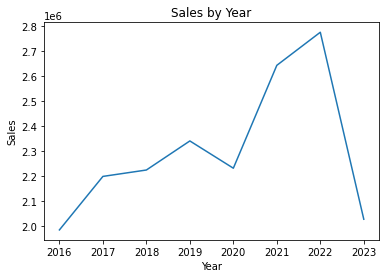

In [ ]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to pandas DataFrame
pandas_df = _sqldf.toPandas()

# Plot a line chart of the sales by year
plt.plot(pandas_df['year'].to_numpy(), pandas_df['sales'].to_numpy())

# Set the chart title and axis labels
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')

# Display the plot
plt.show()

In [ ]:
pandas_df

,year,sales
0,2016,1.984752e+06
1,2017,2.199071e+06
2,2018,2.224704e+06
3,2019,2.341129e+06
4,2020,2.231953e+06
5,2021,2.643987e+06
6,2022,2.776522e+06
7,2023,2.027542e+06


# Build a single forecast first
## Retrieve Data for a Single Item-Customer Combination

In [ ]:
%sql

SELECT
    CAST(TRANSACTION_DATE as date) as ds,
    total_qty as y
  FROM train
  WHERE ORGID_SHIPTO_ORGID='876086' AND ITEM_NUMBER='CAT01586'
  ORDER BY ds

ds,y
2016-01-08,36.0
2016-01-12,36.0
2016-01-13,0.0
2016-01-20,48.0
2016-01-25,36.0
2016-01-28,17.0
2016-01-29,48.0
2016-02-03,36.0
2016-02-10,36.0
2016-02-12,36.0


In [ ]:
# query to aggregate data to date (ds) level
sql_statement = '''
  SELECT
    CAST(TRANSACTION_DATE as date) as ds,
    total_qty as y
  FROM train
  WHERE ORGID_SHIPTO_ORGID='CUSTOMER_NO'
  AND ITEM_NUMBER='ITEM_NO'
  AND TRANSACTION_DATE < '2023-01-01'
  ORDER BY ds
  '''
 
# assemble dataset in Pandas dataframe
history_pd = spark.sql(sql_statement).toPandas()
 
# drop any missing records
history_pd = history_pd.dropna()

In [ ]:
history_pd

,ds,y
0,2016-01-08,36.0
1,2016-01-12,36.0
2,2016-01-13,0.0
3,2016-01-20,48.0
4,2016-01-25,36.0
...,...,...
87,2022-02-15,252.0
88,2022-06-09,336.0
89,2022-06-10,0.0
90,2022-09-29,240.0


In [ ]:
from prophet import Prophet
import logging
 
# disable informational messages from prophet
logging.getLogger('py4j').setLevel(logging.ERROR)

# Train the Prohpet model

In [ ]:
# set model parameters
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )
 
# fit the model to historical data
model.fit(history_pd)

06:04:09 - cmdstanpy - INFO - Chain [1] start processing
06:04:10 - cmdstanpy - INFO - Chain [1] done processing


Out[30]: <prophet.forecaster.Prophet at 0x7f1b600eb1f0>

# Build Forecast

In [ ]:
# define a dataset including both historical dates & 90-days beyond the last available date
future_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )
 
# predict over the dataset
forecast_pd = model.predict(future_pd)
 
#display(forecast_pd)
forecast_pd

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-08,47.100240,-132.341948,211.438173,47.100240,47.100240,-0.328768,-0.328768,-0.328768,0.160170,0.160170,0.160170,-0.488938,-0.488938,-0.488938,0.0,0.0,0.0,31.615176
1,2016-01-12,47.410452,-130.403865,215.049573,47.410452,47.410452,-0.032170,-0.032170,-0.032170,0.369844,0.369844,0.369844,-0.402014,-0.402014,-0.402014,0.0,0.0,0.0,45.885274
2,2016-01-13,47.488005,-148.923379,214.964045,47.488005,47.488005,-0.254294,-0.254294,-0.254294,0.112997,0.112997,0.112997,-0.367291,-0.367291,-0.367291,0.0,0.0,0.0,35.412084
3,2016-01-20,48.030876,-121.859387,248.539957,48.030876,48.030876,0.140602,0.140602,0.140602,0.112997,0.112997,0.112997,0.027605,0.027605,0.027605,0.0,0.0,0.0,54.784119
4,2016-01-25,48.418640,-88.509015,281.292891,48.418640,48.418640,0.815101,0.815101,0.815101,0.413742,0.413742,0.413742,0.401359,0.401359,0.401359,0.0,0.0,0.0,87.884731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2023-03-15,250.521675,-145.625806,208.888191,250.521675,250.521676,-0.865011,-0.865011,-0.865011,0.112997,0.112997,0.112997,-0.978008,-0.978008,-0.978008,0.0,0.0,0.0,33.817701
178,2023-03-16,250.599228,-33.737319,314.765727,250.599228,250.599229,-0.451544,-0.451544,-0.451544,0.547812,0.547812,0.547812,-0.999356,-0.999356,-0.999356,0.0,0.0,0.0,137.442653
179,2023-03-17,250.676781,-148.803763,223.834342,250.676781,250.676782,-0.861180,-0.861180,-0.861180,0.160170,0.160170,0.160170,-1.021351,-1.021351,-1.021351,0.0,0.0,0.0,34.798836
180,2023-03-18,250.754334,-403.372566,-29.589629,250.754334,250.754334,-1.845024,-1.845024,-1.845024,-0.802282,-0.802282,-0.802282,-1.042742,-1.042742,-1.042742,0.0,0.0,0.0,-211.893519


In [ ]:
type(forecast_pd)

Out[39]: pandas.core.frame.DataFrame

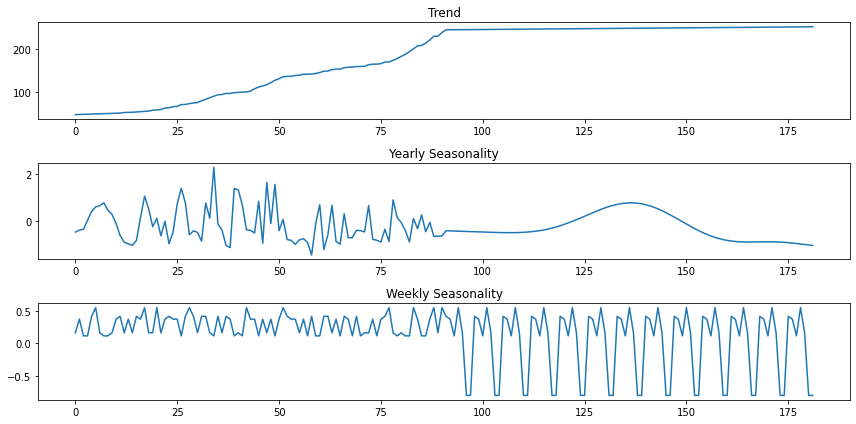

In [ ]:

import matplotlib.pyplot as plt

# Get the components of the forecast
trend = forecast_pd['trend']
yearly_seasonality = forecast_pd['yearly']
weekly_seasonality = forecast_pd['weekly']

# Plot the components
fig, axs = plt.subplots(3, 1, figsize=(12, 6))

axs[0].plot(trend)
axs[0].set_title('Trend')

axs[1].plot(yearly_seasonality)
axs[1].set_title('Yearly Seasonality')

axs[2].plot(weekly_seasonality)
axs[2].set_title('Weekly Seasonality')

fig.tight_layout()

# Display the plot
plt.show()

In [ ]:
forecast_pd.iloc[75:95]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
75,2020-03-10,165.213411,-96.459196,244.312811,165.213411,165.213411,-0.544708,-0.544708,-0.544708,0.369844,0.369844,0.369844,-0.914552,-0.914552,-0.914552,0.0,0.0,0.0,75.220416
76,2020-04-27,168.935953,-7.278469,350.247585,168.935953,168.935953,0.046440,0.046440,0.046440,0.413742,0.413742,0.413742,-0.367302,-0.367302,-0.367302,0.0,0.0,0.0,176.781395
77,2020-04-30,169.168612,-61.823857,294.511641,169.168612,169.168612,-0.345638,-0.345638,-0.345638,0.547812,0.547812,0.547812,-0.893450,-0.893450,-0.893450,0.0,0.0,0.0,110.697556
78,2020-06-19,173.046260,165.076788,542.880321,173.046260,173.046260,1.059599,1.059599,1.059599,0.160170,0.160170,0.160170,0.899429,0.899429,0.899429,0.0,0.0,0.0,356.405885
79,2020-08-12,177.234121,48.915141,408.115031,177.234121,177.234121,0.251387,0.251387,0.251387,0.112997,0.112997,0.112997,0.138390,0.138390,0.138390,0.0,0.0,0.0,221.788525
80,2020-10-16,182.275064,21.280132,376.900800,182.275064,182.275064,0.081416,0.081416,0.081416,0.160170,0.160170,0.160170,-0.078754,-0.078754,-0.078754,0.0,0.0,0.0,197.115197
81,2020-12-16,187.005795,-52.484905,302.234953,187.005795,187.005795,-0.303747,-0.303747,-0.303747,0.112997,0.112997,0.112997,-0.416744,-0.416744,-0.416744,0.0,0.0,0.0,130.203300
82,2021-03-03,192.977373,-153.282086,231.170870,192.977373,192.977373,-0.801046,-0.801046,-0.801046,0.112997,0.112997,0.112997,-0.914043,-0.914043,-0.914043,0.0,0.0,0.0,38.393584
83,2021-05-27,199.569375,143.020670,498.369929,199.569375,199.569375,0.648044,0.648044,0.648044,0.547812,0.547812,0.547812,0.100232,0.100232,0.100232,0.0,0.0,0.0,328.899080
84,2021-08-24,206.471590,45.554906,403.719083,206.471590,206.471590,0.026077,0.026077,0.026077,0.369844,0.369844,0.369844,-0.343767,-0.343767,-0.343767,0.0,0.0,0.0,211.855721


/local_disk0/.ephemeral_nfs/envs/pythonEnv-4750b292-21db-49c6-9777-8925a028e2ec/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/local_disk0/.ephemeral_nfs/envs/pythonEnv-4750b292-21db-49c6-9777-8925a028e2ec/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


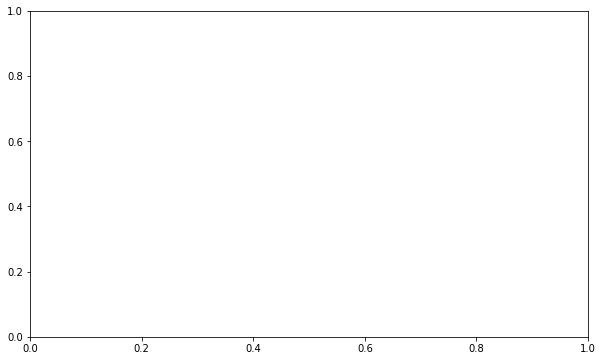

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-3472176014721113>:1
----> 1 predict_fig = model.plot( forecast_pd, xlabel='date', ylabel='sales')
      3 # adjust figure to display dates from last year + the 90 day forecast
      4 xlim = predict_fig.axes[0].get_xlim()

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-4750b292-21db-49c6-9777-8925a028e2ec/lib/python3.9/site-packages/prophet/forecaster.py:1835, in Prophet.plot(self, fcst, ax, uncertainty, plot_cap, xlabel, ylabel, figsize, include_legend)
   1815 def plot(self, fcst, ax=None, uncertainty=True, plot_cap=True,
   1816          xlabel='ds', ylabel='y', figsize=(10, 6), include_legend=False):
   1817     """Plot the Prophet forecast.
   1818 
   1819     Parameters
   (...)
   1833     A matplotlib figure.
   1834     """
-> 1835     return plot(
   1836         m=self, fcst=fcst, ax=ax, uncertainty=uncertaint

In [ ]:
predict_fig = model.plot( forecast_pd, xlabel='date', ylabel='sales')
 
# adjust figure to display dates from last year + the 90 day forecast
xlim = predict_fig.axes[0].get_xlim()
new_xlim = ( xlim[1]-(180.0+365.0), xlim[1]-90.0)
predict_fig.axes[0].set_xlim(new_xlim)
 
display(predict_fig)